# Dimensionality Reduction: some examples

In [10]:
from auxiliar_functions import *
from data_load import *

import sklearn.manifold as mani

os.chdir('/home/facu/Documents/Repositorios/dimensionality-reduction/')

## MNIST dataset

In [16]:
data_set = 'MNIST'

dic = import_data_set (data = 'MNIST', 
                     size = 500,                             # for MINST is the number of each cluster
                     random_sample = True ,
                     ploteo = False, 
                     save = False, 
                     which_digits = [0,1,2,3,4,5,6,7,8,9],    # just for MNIST
                     numero_de_componentes = 30,              # just for MNIST
                     metrica = 'euclidean' )

data = dic["data"]
distances_matrix_MNIST = dic['distance']
labels_MNIST = dic['labels']
datacruda_MNIST = dic["data_cruda"]
dataPCA_MNIST = dic["data_proyectada"]

Extracting Data sets/MNIST_data/train-images-idx3-ubyte.gz
Extracting Data sets/MNIST_data/train-labels-idx1-ubyte.gz
Extracting Data sets/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting Data sets/MNIST_data/t10k-labels-idx1-ubyte.gz


## Principal Components Analysis

Comparamos como se ven las imágenes originales de MNIST (28 x 28 = 784 dimensiones) comparadas con las imágenes trasnformadas luego de realizar una proyección sobre sólo 30 componentes principales.

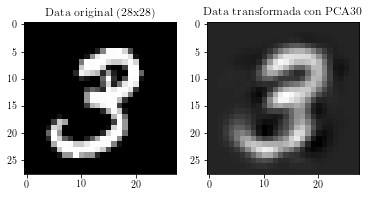

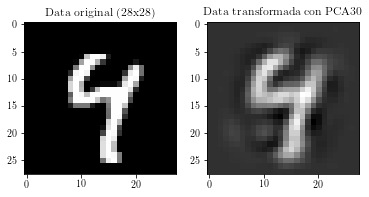

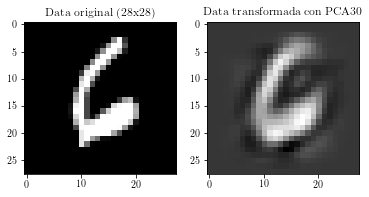

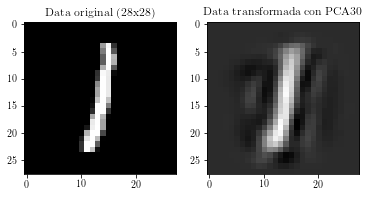

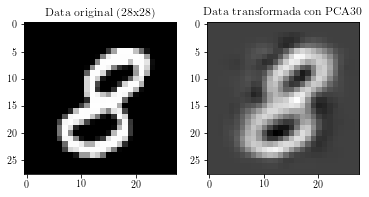

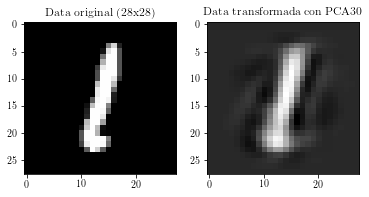

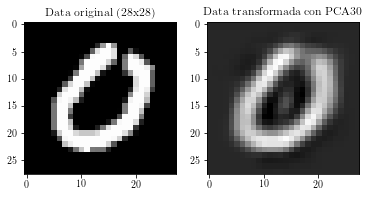

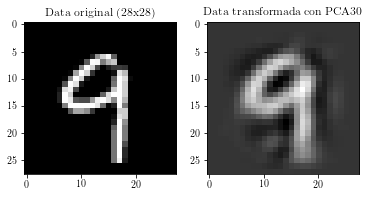

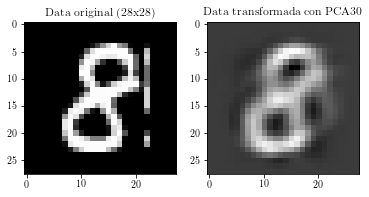

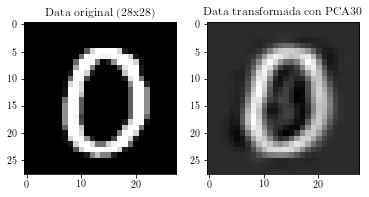

In [3]:
for i in range(10):
    plt.close()
    fix, (ax1, ax2) = plt.subplots(1,2)
    ax1.imshow(datacruda_MNIST[i], cmap='gray') ; ax1.set_title('Data original (28x28)') 
    ax2.imshow(dataPCA_MNIST[i], cmap='gray')   ; ax2.set_title('Data transformada con PCA30')
    plt.show()

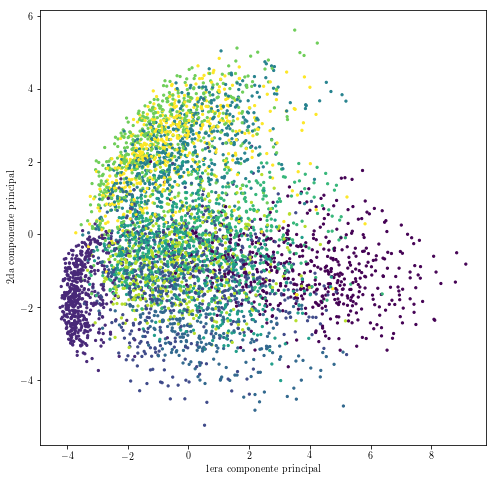

In [7]:
plt.close()
plt.figure(figsize=(8,8))
plt.scatter(data[:,0], data[:,1], c=labels_MNIST, s=5)
plt.xlabel('1era componente principal')
plt.ylabel('2da componente principal')
plt.show()

## Multidimnesional Scaling (MDS)

In [61]:
MDS = mani.MDS(n_components=2, 
               metric=True, 
               n_init=4, 
               max_iter=500, 
               verbose=0, 
               eps=0.001, 
               n_jobs=-1, 
               random_state=None, 
               dissimilarity='precomputed')

In [62]:
pos_MDS = MDS.fit(distances_matrix_MNIST).embedding_

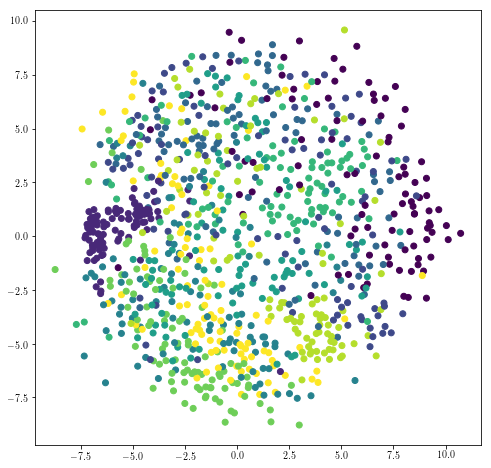

In [66]:
plt.close()
plt.figure(figsize=(8,8))
plt.scatter(pos_MDS[:,0], pos_MDS[:,1], c=labels_MNIST, s=5)
plt.show()

## Isomap

In [17]:
Isomap = mani.Isomap(n_neighbors=10, 
                     n_components=2,
                     eigen_solver='auto', 
                     tol=0, 
                     max_iter=None, 
                     path_method='auto', 
                     neighbors_algorithm='auto', 
                     n_jobs=1)

In [18]:
pos_Isomap = Isomap.fit(data).embedding_

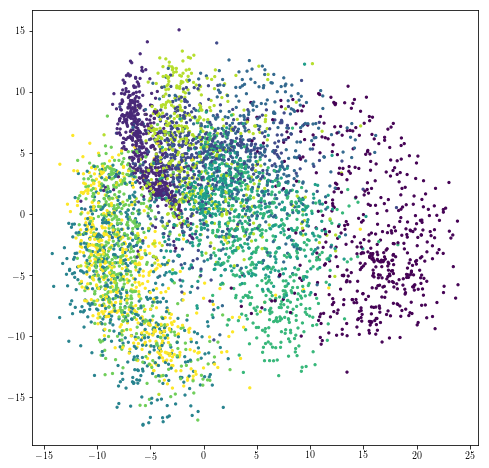

In [19]:
plt.close()
plt.figure(figsize=(8,8))
plt.scatter(pos_Isomap[:,0], pos_Isomap[:,1], c=labels_MNIST, s=5)
plt.show()

## t-SNE

In [73]:
TSNE = mani.TSNE(n_components=2, 
                 perplexity=30.0, 
                 early_exaggeration=12.0, 
                 learning_rate=200.0, 
                 n_iter=1000, 
                 n_iter_without_progress=300, 
                 min_grad_norm=1e-07, 
                 metric='precomputed', 
                 init='random', 
                 verbose=0, 
                 random_state=None, 
                 method='barnes_hut', 
                 angle=0.5)

In [74]:
pos_TSNE = TSNE.fit(distances_matrix_MNIST).embedding_

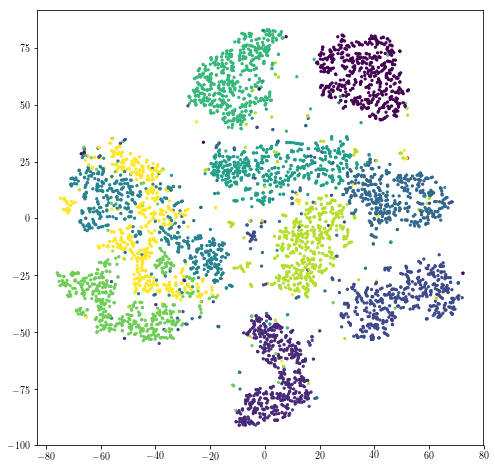

In [84]:
plt.close()
plt.figure(figsize=(8,8))
plt.scatter(pos_TSNE[:,0], pos_TSNE[:,1], c=labels_MNIST, s=5)
plt.show()